# AI Research Paper Analysis

This notebook analyzes and processes the research papers dataset for LLM fine-tuning.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.grid': True
})

## 2. Load and Process Research Papers

In [3]:
def read_markdown_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    return content

# Read the dataset
file_path = Path('d:/works/intellihack5.0/task3/q3_dataset/dataset.md')
content = read_markdown_file(file_path)

# Split into sections
sections = content.split('#')
sections = [s.strip() for s in sections if s.strip()]

print(f"Found {len(sections)} major sections")
for i, section in enumerate(sections, 1):
    print(f"\nSection {i}: {section.split('\n')[0]}")

Found 13 major sections

Section 1: DualPipe

Section 2: About

Section 3: Profiling Data in DeepSeek Infra

Section 4: Training

Section 5: Inference

Section 6: Prefilling

Section 7: Decoding

Section 8: Expert Parallelism Load Balancer (EPLB)

Section 9: The Algorithm

Section 10: Hierarchical Load Balancing

Section 11: Global Load Balancing

Section 12: Fire-Flyer File system

Section 13: Performance


## 3. Extract Topics and Concepts

In [4]:
def extract_key_concepts(text):
    # Split into paragraphs
    paragraphs = [p.strip() for p in text.split('\n\n') if p.strip()]
    
    # Create a DataFrame
    df = pd.DataFrame({
        'text': paragraphs,
        'length': [len(p.split()) for p in paragraphs]
    })
    
    return df

# Process each section
all_concepts = []
for section in sections:
    concepts = extract_key_concepts(section)
    all_concepts.append(concepts)

# Combine results
df_concepts = pd.concat(all_concepts).reset_index(drop=True)
print("\nText Statistics:")
print(df_concepts['length'].describe())


Text Statistics:
count     32.000000
mean      37.750000
std       32.577451
min        1.000000
25%        4.000000
50%       40.500000
75%       68.250000
max      100.000000
Name: length, dtype: float64


## 4. Visualize Text Distribution

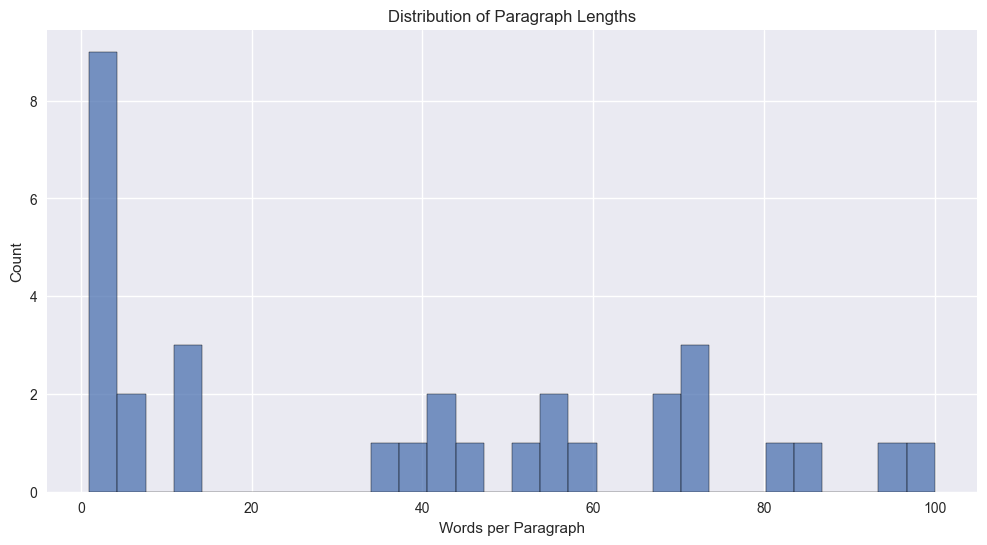

In [5]:
# Plot paragraph length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_concepts, x='length', bins=30)
plt.title('Distribution of Paragraph Lengths')
plt.xlabel('Words per Paragraph')
plt.ylabel('Count')
plt.show()

## 5. Generate Training Examples

In [6]:
def generate_qa_pair(text):
    # Structure for training example
    example = {
        "instruction": "Answer the following question about AI research:",
        "input": text[:500],  # Limit context length
        "output": "Based on the provided text..."
    }
    return example

# Generate examples from longer paragraphs
training_examples = []
for text in df_concepts[df_concepts['length'] > 50]['text']:
    example = generate_qa_pair(text)
    training_examples.append(example)

print(f"Generated {len(training_examples)} training examples")
print("\nExample format:")
print(training_examples[0])

Generated 13 training examples

Example format:
{'instruction': 'Answer the following question about AI research:', 'input': 'Profiling Data in DeepSeek Infra\nHere, we publicly share profiling data from our training and inference framework to help the community better understand the communication-computation overlap strategies and low-level implementation details. The profiling data was captured using the PyTorch Profiler. After downloading, you can visualize it directly by navigating to chrome://tracing in the Chrome browser (or edge://tracing in the Edge browser). Notice that we simulate an absolutely balanced MoE ro', 'output': 'Based on the provided text...'}


## 6. Save Processed Dataset

In [7]:
import json

# Save as JSON
output_path = Path('data/processed/training_data.json')
output_path.parent.mkdir(parents=True, exist_ok=True)

with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(training_examples, f, indent=2)

print(f"Saved {len(training_examples)} examples to {output_path}")

Saved 13 examples to data\processed\training_data.json
